## Logistic Regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize,select_binarydata
from model.logistic import LogisticRegression


#Q5 - (b) - Evaluate the model on Speed limit 100km/h vs 120km/h using the unaligned dataset

In [15]:
#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
X,Y = traffic_sign(False) # check true and false
#data normalize
train_data_normalized = X.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data_normalized) 
load_data = train_data_normalized, Y

load_data_binary = select_binarydata(load_data,7,8)
#data splits 80/10/10
train_data, train_label, valid_data, valid_label, test_data, test_label = generate_no_fold_set(load_data_binary,10)


(34799, 1024) (34799,)
FOLDWIDTH: 255


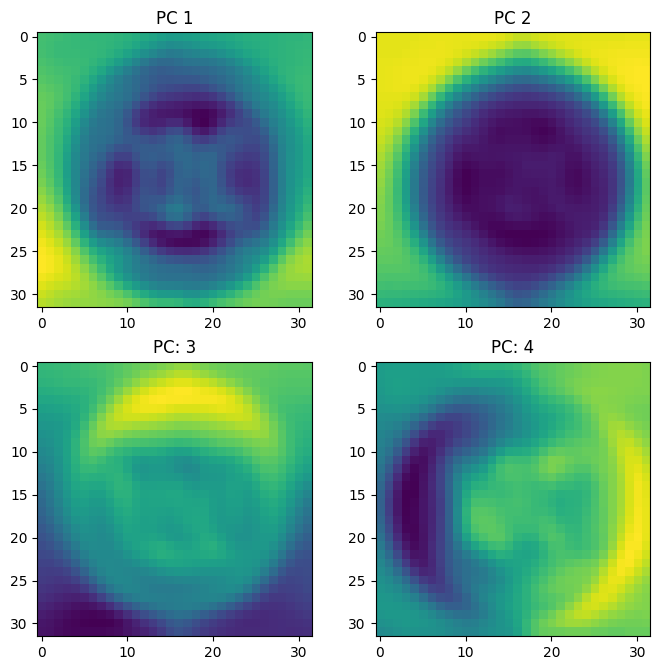

 best test accuracy : 0.8941176470588236


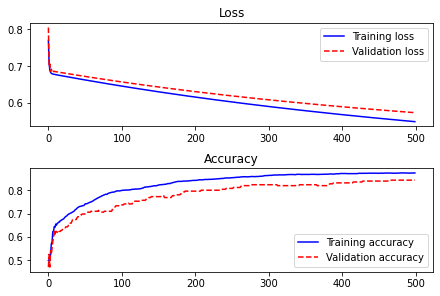

In [25]:
#train 50 epochs as opposed to 300
#learning rate
n_components = 100


pca = PCA(n_components)
projected = pca.fit_transform(train_data)
pca.plot_PC()

train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []

train_l = np.copy(train_label)//8 # 7 or 8
valid_l = np.copy(valid_label)//8 # 7 or 8
test_l = np.copy(test_label)//8 # 7 or 8

Alpha = 0.0032
w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)
#weight
train_d = projected 
valid_d = pca.transform(valid_data)
test_d = pca.transform(test_data)

for epoch in range(500):
    #logistic model 
    train_y = logistic.logistic_model(w, train_d)
    #loss check
    train_loss = logistic.loss_binary(train_y, train_l)
    #gradient check
    train_loss_record.append(train_loss)
    train_accuracy = logistic.check_accuracy(train_y, train_l)
    train_accuracy_record.append(train_accuracy)
    #process for validation sets only checking the accuray, not updating the weight
    holdout_y = logistic.logistic_model(w,valid_d)
    holdout_loss = logistic.loss_binary(holdout_y, valid_l)
    holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
    holdout_loss_record.append(holdout_loss)
    holdout_accuracy_record.append(holdout_accuracy)
    #evaluate best option for test sets
    
    if holdout_accuracy >= max(holdout_accuracy_record):
        best_w = w
        test_y = logistic.logistic_model(best_w, test_d)
        test_accuracy = logistic.check_accuracy(test_y, test_l)
    
    #update the weight
    w = logistic.update_weight(w, train_d, train_y, train_l)
    
    #print(f' train accuracy, loss: {train_accuracy, train_loss }')
    
print(f' best test accuracy : {test_accuracy }')
#plot result

fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.savefig('test2png.png', dpi=100)

axs[0].plot(train_loss_record, '-b', label='Training loss')
axs[0].plot(holdout_loss_record, '--r', label='Validation loss')
axs[0].legend();
axs[0].set_title('Loss')

axs[1].plot(train_accuracy_record, '-b', label='Training accuracy')
axs[1].plot(holdout_accuracy_record, '--r', label='Validation accuracy')
axs[1].legend();
axs[1].set_title('Accuracy')

plt.show()
   

#Q5 - (c) - Evaluate the model on Speed limit 100km/h vs 120km/h using the aligned dataset

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize,select_binarydata
from model.logistic import LogisticRegression

#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
X,Y = traffic_sign(True) # check true and false
#data normalize
train_data_normalized = X.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data_normalized) 
load_data = train_data_normalized, Y

load_data_binary = select_binarydata(load_data,7,8)
#data normalize


(34799, 1024) (34799,)


**********


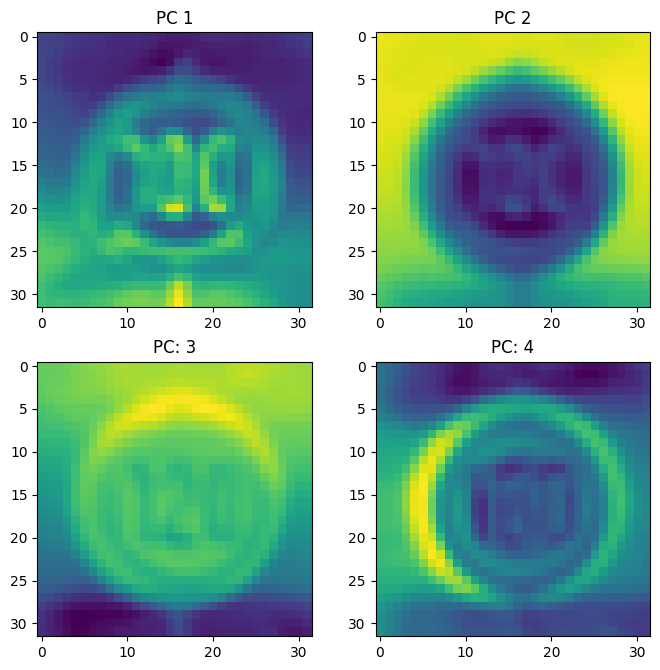

 epoch: 50, train accuracy: 0.6867647058823529
 epoch: 100, train accuracy: 0.8200980392156862
 epoch: 150, train accuracy: 0.8862745098039215
 epoch: 200, train accuracy: 0.9191176470588235
 epoch: 250, train accuracy: 0.9372549019607843
 epoch: 300, train accuracy: 0.9504901960784313
 best test accuracy : 0.9176470588235294
**********
 epoch: 50, train accuracy: 0.6372549019607843
 epoch: 100, train accuracy: 0.7627450980392156
 epoch: 150, train accuracy: 0.861764705882353
 epoch: 200, train accuracy: 0.9156862745098039
 epoch: 250, train accuracy: 0.9343137254901961
 epoch: 300, train accuracy: 0.9470588235294117
 best test accuracy : 0.9333333333333333
**********
 epoch: 50, train accuracy: 0.6975490196078431
 epoch: 100, train accuracy: 0.825
 epoch: 150, train accuracy: 0.8784313725490196
 epoch: 200, train accuracy: 0.9102941176470588
 epoch: 250, train accuracy: 0.9357843137254902
 epoch: 300, train accuracy: 0.9455882352941176
 best test accuracy : 0.9254901960784314
********

In [31]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
train_accuracy_record = []
  = 0.0033
n_components = 150
epochs_print = [50, 100, 150, 200, 250, 300]
epochs = 300
k = 0

#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    w = np.random.rand(n_components + 1)
    train_loss_record.append([])
    holdout_loss_record.append([])

    #first_plot = True
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test
    

    pca = PCA(n_components)
    projected = pca.fit_transform(train_data)
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.transform(valid_data)
    test_d = pca.transform(test_data)
    train_l = np.copy(train_label)//8
    valid_l = np.copy(valid_label)//8
    test_l = np.copy(test_label)//8
    
    logistic = LogisticRegression(Alpha)
  
    for epoch in range(epochs):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record[k].append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record[k].append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        if holdout_accuracy >= max(holdout_accuracy_record):
            best_w = w
            test_y = logistic.logistic_model(best_w, test_d)
            test_accuracy = logistic.check_accuracy(test_y, test_l)

        #update the weight
        w = logistic.update_weight(w,train_d, train_y, train_l)
    
        if (epoch + 1) in epochs_print:
            print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy}')
            
    print(f' best test accuracy : {test_accuracy }')
    test_accuracy_record.append(test_accuracy)
    test_accuracy = []
    holdout_accuracy = []
    holdout_accuracy_record = []


    #update fold
    k = k+1

print(f' test_accuracy mean : {np.mean(test_accuracy_record)}')       


    

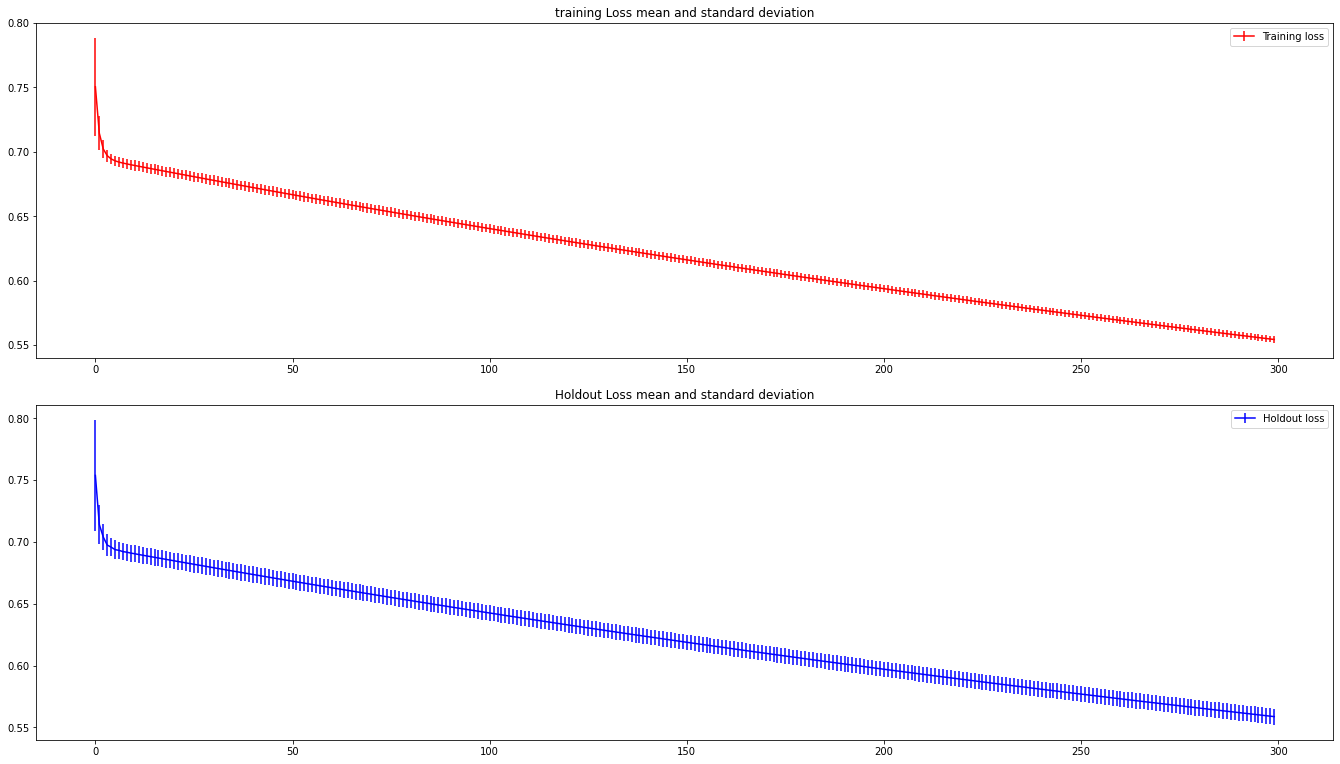

In [34]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

#axs[0].plot((np.mean(train_loss_record,axis=0)), '-b', label='Training loss')
yerr = np.std(train_loss_record,axis=0)
axs[0].errorbar(np.arange(300),np.mean(train_loss_record,axis=0),yerr=yerr,color = 'r', label='Training loss')
axs[0].legend();
axs[0].set_title('training Loss mean and standard deviation')

yerr = np.std(holdout_loss_record,axis=0)
axs[1].errorbar(np.arange(300),np.mean(holdout_loss_record,axis=0),yerr=yerr,color = 'b', label='Holdout loss')
axs[1].legend();
axs[1].set_title('Holdout Loss mean and standard deviation')
plt.show()

# standard deviation error bars.


In [118]:
#-(c) 3times simulation with different learning rate

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

(34799, 1024) (34799,)
**********


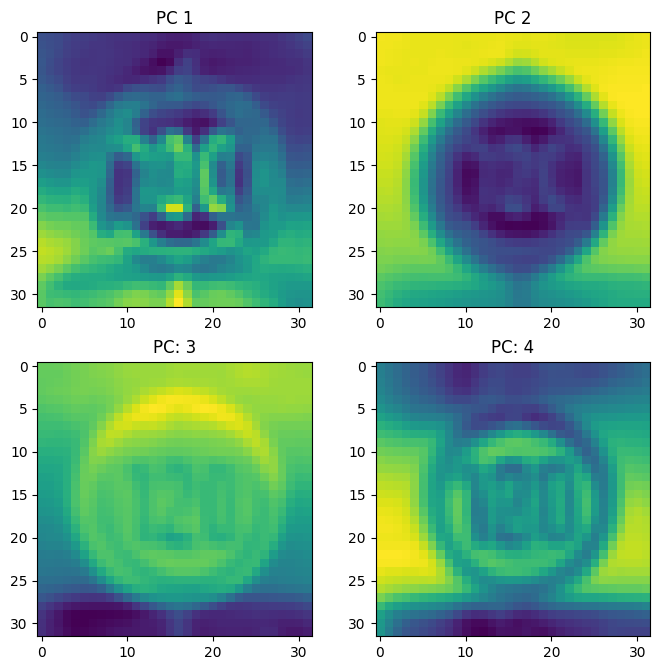

 learning rate : 0.003 ,k: 0, best test accuracy : 0.9215686274509803
**********
 learning rate : 0.003 ,k: 1, best test accuracy : 0.9529411764705882
**********
 learning rate : 0.003 ,k: 2, best test accuracy : 0.8941176470588236
**********
 learning rate : 0.003 ,k: 3, best test accuracy : 0.9647058823529412
**********
 learning rate : 0.003 ,k: 4, best test accuracy : 0.9254901960784314
**********
 learning rate : 0.003 ,k: 5, best test accuracy : 0.9254901960784314
**********
 learning rate : 0.003 ,k: 6, best test accuracy : 0.9725490196078431
**********
 learning rate : 0.003 ,k: 7, best test accuracy : 0.9411764705882353
1
**********
 learning rate : 0.003 ,k: 8, best test accuracy : 0.9137254901960784
2
**********
 learning rate : 0.003 ,k: 9, best test accuracy : 0.8941176470588236
 test_accuracy mean : 0.9305882352941177
**********


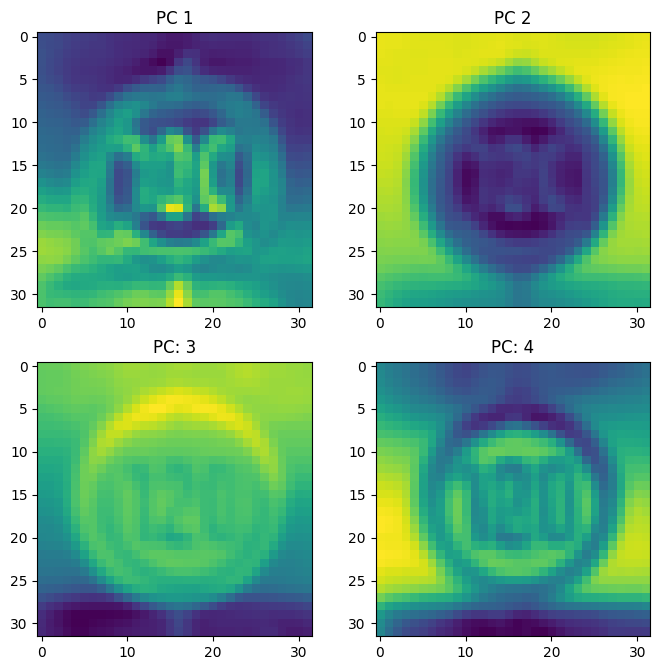

 learning rate : 0.004 ,k: 0, best test accuracy : 0.9490196078431372
**********
 learning rate : 0.004 ,k: 1, best test accuracy : 0.9098039215686274
**********
 learning rate : 0.004 ,k: 2, best test accuracy : 0.9568627450980393
**********
 learning rate : 0.004 ,k: 3, best test accuracy : 0.9254901960784314
**********
 learning rate : 0.004 ,k: 4, best test accuracy : 0.9137254901960784
**********
 learning rate : 0.004 ,k: 5, best test accuracy : 0.9490196078431372
**********
 learning rate : 0.004 ,k: 6, best test accuracy : 0.9450980392156862
**********
 learning rate : 0.004 ,k: 7, best test accuracy : 0.9490196078431372
1
**********
 learning rate : 0.004 ,k: 8, best test accuracy : 0.9450980392156862
2
**********
 learning rate : 0.004 ,k: 9, best test accuracy : 0.9254901960784314
 test_accuracy mean : 0.9368627450980392
**********


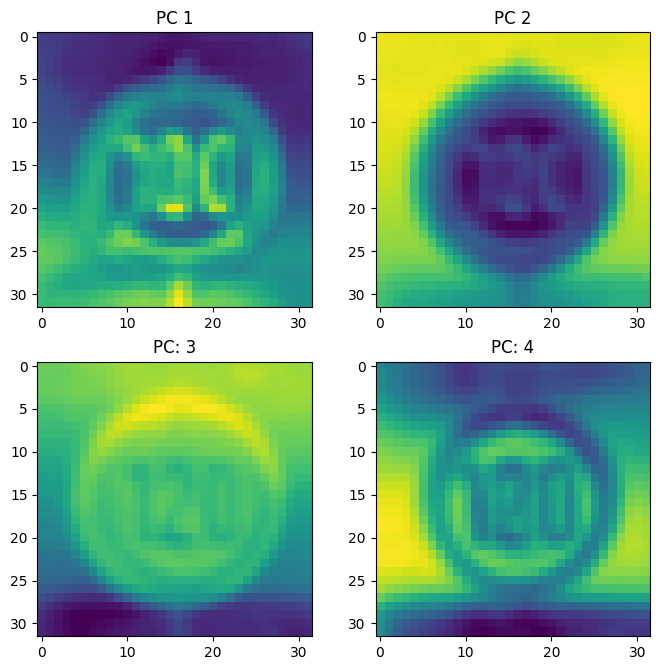

 learning rate : 0.01 ,k: 0, best test accuracy : 0.4980392156862745
**********
 learning rate : 0.01 ,k: 1, best test accuracy : 0.5098039215686274
**********
 learning rate : 0.01 ,k: 2, best test accuracy : 0.5058823529411764
**********
 learning rate : 0.01 ,k: 3, best test accuracy : 0.47843137254901963
**********
 learning rate : 0.01 ,k: 4, best test accuracy : 0.5176470588235295
**********
 learning rate : 0.01 ,k: 5, best test accuracy : 0.4980392156862745
**********
 learning rate : 0.01 ,k: 6, best test accuracy : 0.4588235294117647
**********
 learning rate : 0.01 ,k: 7, best test accuracy : 0.4823529411764706
1
**********
 learning rate : 0.01 ,k: 8, best test accuracy : 0.4588235294117647
2
**********
 learning rate : 0.01 ,k: 9, best test accuracy : 0.47058823529411764
 test_accuracy mean : 0.487843137254902


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize,select_binarydata
from model.logistic import LogisticRegression

#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
X,Y = traffic_sign(True) # check true and false
#data normalize
train_data_normalized = X.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data_normalized) 
load_data = train_data_normalized, Y

load_data_binary = select_binarydata(load_data,7,8)
#data normalize

# learning rate
lrs = [0.003, 0.004,0.01]

for lr in range(np.size(lrs)) : 
    Alpha = lrs[lr]

    train_loss_record = []
    holdout_loss_record = []
    holdout_accuracy_record = []
    test_accuracy_record = []
    train_accuracy_record = []
    n_components = 150
    epochs_print = [50, 100, 150, 200, 250, 300]
    epochs = 300
    k = 0

    #fold sets add
    first_plot = True
    for train, valid, test in generate_k_fold_set((load_data_binary)):
        print("**********")
        w = np.random.rand(n_components + 1)
        train_loss_record.append([])
        holdout_loss_record.append([])

        #first_plot = True
        train_data, train_label = train
        valid_data, valid_label = valid
        test_data, test_label = test


        pca = PCA(n_components)
        projected = pca.fit_transform(train_data)
        #plot first principle component
        if first_plot == True : 
            pca.plot_PC()
            first_plot = False
        train_d = projected     
        valid_d = pca.transform(valid_data)
        test_d = pca.transform(test_data)
        train_l = np.copy(train_label)//8
        valid_l = np.copy(valid_label)//8
        test_l = np.copy(test_label)//8

        logistic = LogisticRegression(Alpha)

        for epoch in range(epochs):
            #logistic model 
            train_y = logistic.logistic_model(w, train_d)
            #loss check
            train_loss = logistic.loss_binary(train_y, train_l)
            #gradient check
            train_loss_record[k].append(train_loss)
            train_accuracy = logistic.check_accuracy(train_y, train_l)
            train_accuracy_record.append(train_accuracy)
            #process for validation sets only checking the accuray, not updating the weight
            holdout_y = logistic.logistic_model(w,valid_d)
            holdout_loss = logistic.loss_binary(holdout_y, valid_l)
            holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
            holdout_loss_record[k].append(holdout_loss)
            holdout_accuracy_record.append(holdout_accuracy)
            #evaluate best option for test sets
            if holdout_accuracy >= max(holdout_accuracy_record):
                best_w = w
                test_y = logistic.logistic_model(best_w, test_d)
                test_accuracy = logistic.check_accuracy(test_y, test_l)

            #update the weight
            w = logistic.update_weight(w,train_d, train_y, train_l)

            #if (epoch + 1) in epochs_print:
             #   print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy}')

        print(f' learning rate : {Alpha} ,k: {k}, best test accuracy : {test_accuracy }')
        test_accuracy_record.append(test_accuracy)
        test_accuracy = []
        holdout_accuracy = []
        holdout_accuracy_record = []


        #update fold
        k = k+1

    print(f' test_accuracy mean : {np.mean(test_accuracy_record)}')       


    





In [ ]:
##Q5 - (d) - Evaluate the model on Curve Left(19) vs Right(20) using the aligned dataset

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize
from model.logistic import LogisticRegression

#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
X,Y = traffic_sign(True) # check true and false
#data normalize
train_data_normalized = X.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data_normalized) 


load_data = train_data_normalized, Y
load_data_binary = select_binarydata(load_data,19,20)
#data normalize


(34799, 1024) (34799,)


**********


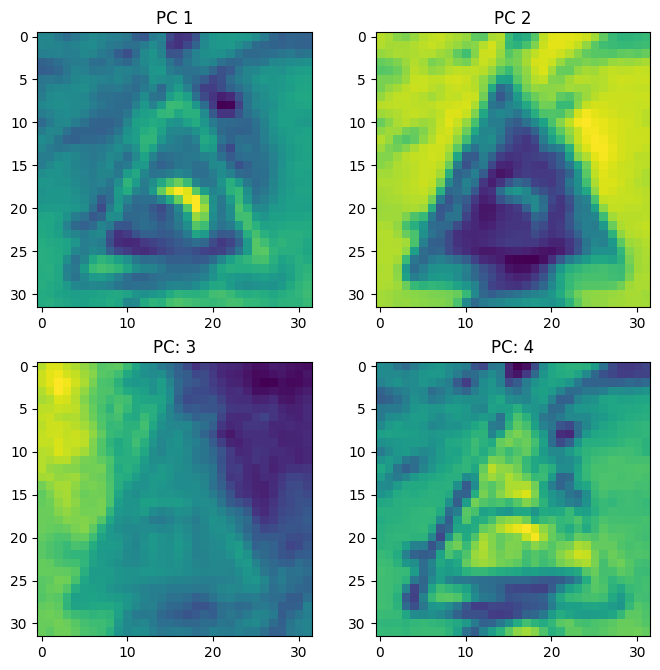

 epoch: 50, train accuracy: 0.6380208333333334
 epoch: 100, train accuracy: 0.6744791666666666
 epoch: 150, train accuracy: 0.7109375
 epoch: 200, train accuracy: 0.75
 epoch: 250, train accuracy: 0.7916666666666666
 epoch: 300, train accuracy: 0.8333333333333334
 best test accuracy : 0.8333333333333334
**********
 epoch: 50, train accuracy: 0.625
 epoch: 100, train accuracy: 0.6458333333333334
 epoch: 150, train accuracy: 0.6692708333333334
 epoch: 200, train accuracy: 0.6875
 epoch: 250, train accuracy: 0.7161458333333334
 epoch: 300, train accuracy: 0.7447916666666666
 best test accuracy : 0.7916666666666666
**********
 epoch: 50, train accuracy: 0.7578125
 epoch: 100, train accuracy: 0.7864583333333334
 epoch: 150, train accuracy: 0.8072916666666666
 epoch: 200, train accuracy: 0.828125
 epoch: 250, train accuracy: 0.84375
 epoch: 300, train accuracy: 0.8567708333333334
 best test accuracy : 0.8541666666666666
**********
 epoch: 50, train accuracy: 0.8046875
 epoch: 100, train accu

In [23]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
Alpha = 0.003
n_components = 120

w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)
epochs_print = [50, 100, 150, 200, 250, 300]
epochs = 300
#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    train_loss_record = []
    train_accuracy_record = []
    holdout_loss_record = []
    holdout_accuracy_record = []
    test_accuracy = []
    
    #first_plot = True
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test

    pca = PCA(n_components)
    projected = pca.fit_transform(train_data)
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.transform(valid_data)
    test_d = pca.transform(test_data)
    train_l = np.copy(train_label)//20
    valid_l = np.copy(valid_label)//20
    test_l = np.copy(test_label)//20
    
    for epoch in range(epochs):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record.append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        if holdout_accuracy >= max(holdout_accuracy_record):
            best_w = w
            test_y = logistic.logistic_model(best_w, test_d)
            test_accuracy = logistic.check_accuracy(test_y, test_l)

        #update the weight
        w = logistic.update_weight(w,train_d, train_y, train_l)
    
        if (epoch + 1) in epochs_print:
            print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy}')
            
    print(f' best test accuracy : {test_accuracy }')       
    test_accuracy_record.append(test_accuracy)
    test_accuracy = []
    holdout_accuracy = []
    holdout_accuracy_record = []

    #update fold
    k = k+1

print(f' test accuracy mean : {np.mean(test_accuracy_record)}')       
    
    
    

In [ ]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

#axs[0].plot((np.mean(train_loss_record,axis=0)), '-b', label='Training loss')
yerr = np.std(train_loss_record,axis=0)
axs[0].errorbar(np.arange(300),np.mean(train_loss_record,axis=0),yerr=yerr,color = 'r', label='Training loss')
axs[0].legend();
axs[0].set_title('training Loss mean and standard deviation')

yerr = np.std(holdout_loss_record,axis=0)
axs[1].errorbar(np.arange(300),np.mean(holdout_loss_record,axis=0),yerr=yerr,color = 'b', label='Holdout loss')
axs[1].legend();
axs[1].set_title('Holdout Loss mean and standard deviation')
plt.show()

# standard deviation error bars.